In [52]:
%matplotlib widget

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from SSA_Decomposition import ssa_decomposition

font = {'size': 12}
matplotlib.rc('font', **font)

In [53]:
# The PPG signal (sampled at 25Hz)
data_csv = pd.read_csv('ppg.csv')
fs = 25
# Extract ppg and acceleromter signals between 200s and 400s
ppg = data_csv['ppg'][200*fs:400*fs].to_numpy()
acc_x = data_csv['acc_x'][200*fs:400*fs].to_numpy()
acc_y = data_csv['acc_y'][200*fs:400*fs].to_numpy()
acc_z = data_csv['acc_z'][200*fs:400*fs].to_numpy()
acc_norm = np.sqrt(acc_x*acc_x+acc_y*acc_y+acc_z*acc_z)

time = np.arange(0, len(ppg)/fs, 1/fs)

Text(0.5, 0, 'Time (s)')

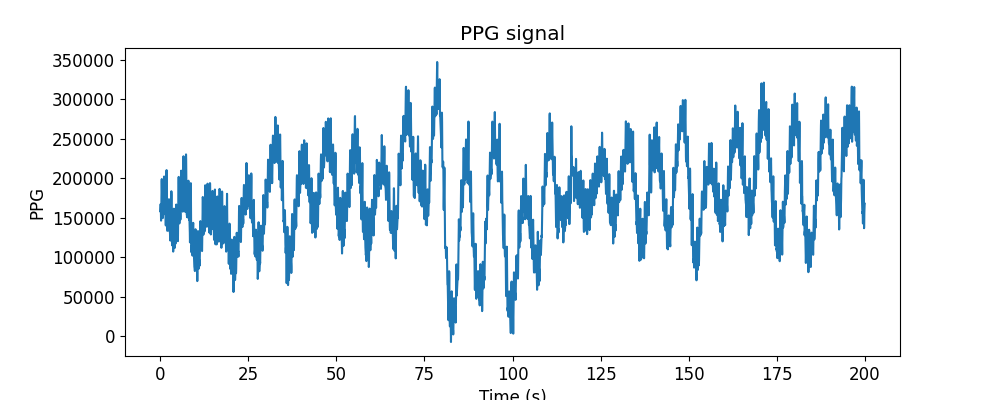

In [54]:
# Plot data
fig = plt.figure(figsize=(10,4))
plt.plot(time, ppg)
plt.title('PPG signal')
plt.ylabel('PPG')
plt.xlabel('Time (s)')

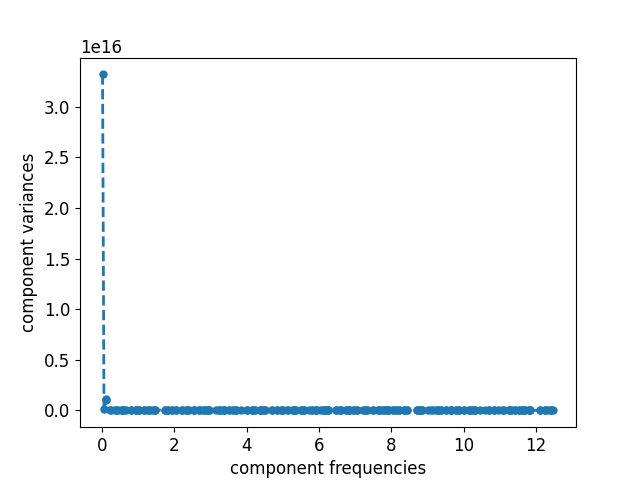

In [55]:
# Find a window length L, so that the first component obtained using the function SSA_decomposition 
# corresponds to the long-term drift (baseline) on both ppg and accelerometer signals.

# First SSA decomposition to extract long term drift
# Find the length L in samples, so that SVD first component corresponds to
# long term drift signal.
L = 220  # Example value, adjust as needed
# Decompose PPG signal
Y_1, fc_1, sig_1 = ssa_decomposition(ppg, L, fs, 2)

Text(0.5, 0, 'Time (s)')

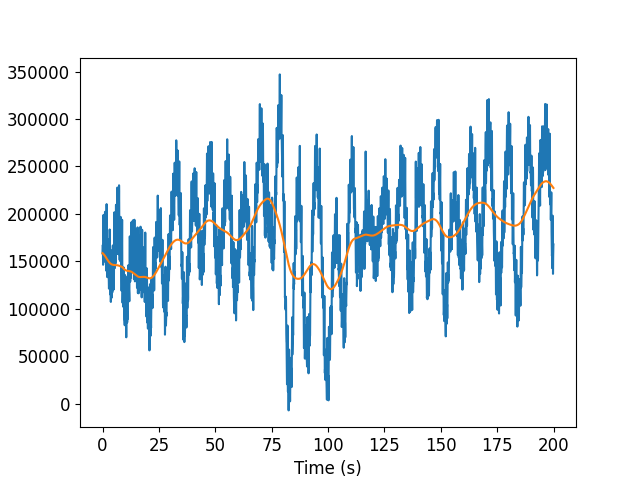

In [56]:
# Plot signal and its baseline 
fig = plt.figure()
plt.plot(time, ppg)
plt.plot(time, Y_1[:, 0].flatten(), label='baseline')
plt.ylabel('PPG')
plt.xlabel('Time (s)')

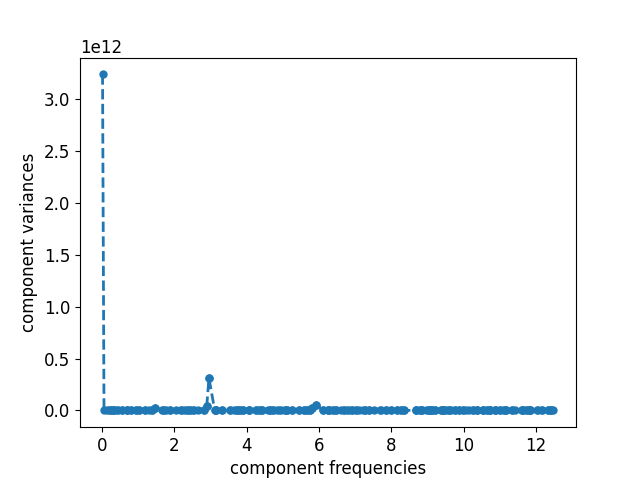

In [57]:
# First SSA decomposition to extract long term drift from accelerometer
Y_acc1, fc_acc1, sig_acc1 = ssa_decomposition(acc_norm, L, fs, 2)

Text(0.5, 0, 'Time (s)')

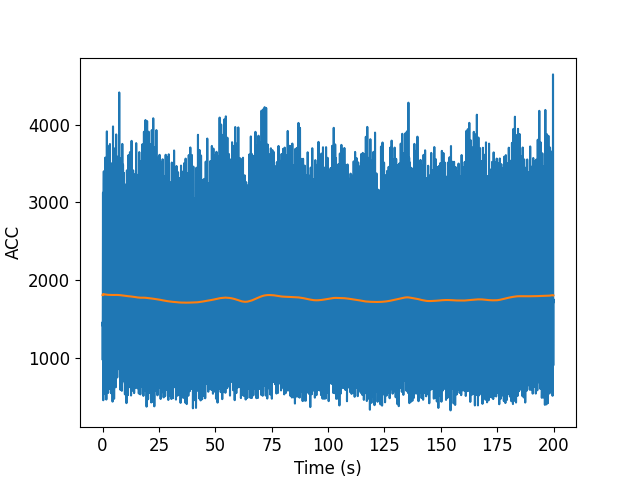

In [58]:
fig = plt.figure()
plt.plot(time, acc_norm)
plt.plot(time, Y_acc1[:, 0].flatten(), label='baseline')
plt.ylabel('ACC')
plt.xlabel('Time (s)')

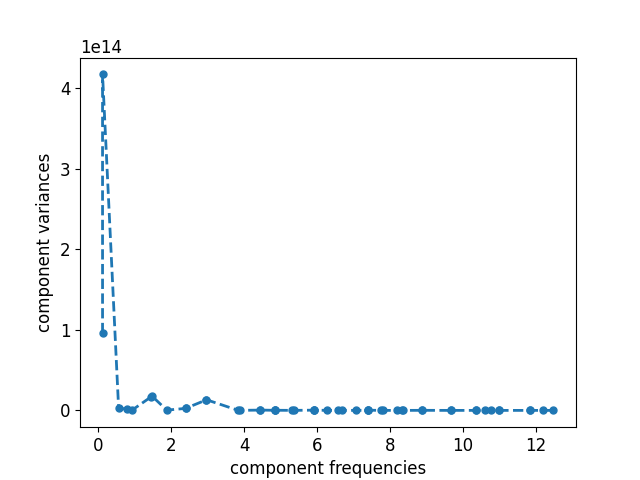

In [78]:
# Remove First component
filt_x = ppg - Y_1[:, 0]

'''Q3.2'''
# Apply SSA on signal without baseline
# Set L to identify and remove respiration component
L = 50  # Example value, adjust as needed
Y_2, fc_2, sig_2 = ssa_decomposition(filt_x, L, fs, 2)

Text(0.5, 0, 'Time (s)')

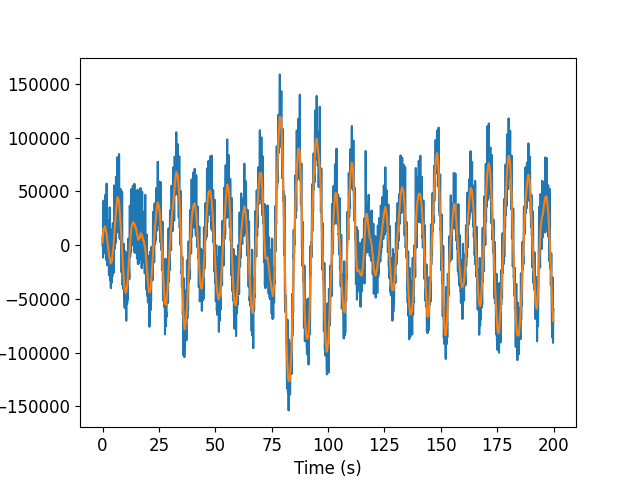

In [79]:
# Find components characterizing respiration
resp_components = [0, 1]
fig = plt.figure()
plt.plot(time, filt_x)
plt.plot(time, np.sum(Y_2[:, resp_components], axis=1), label='Respiration')
plt.ylabel('PPG')
plt.xlabel('Time (s)')

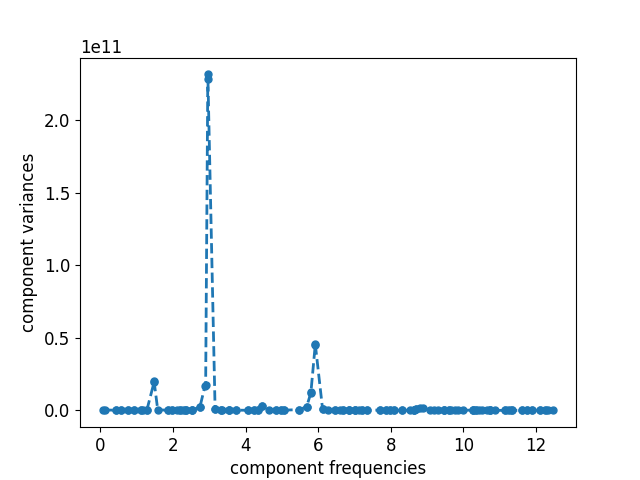

In [94]:
# Remove First component
filt_acc = acc_norm - Y_acc1[:, 0]
# Apply SSA on accelerometer norm without baseline
Y_acc2, fc_acc2, sig_acc2 = ssa_decomposition(filt_acc, L, fs, 2)

Text(0.5, 0, 'Time (s)')

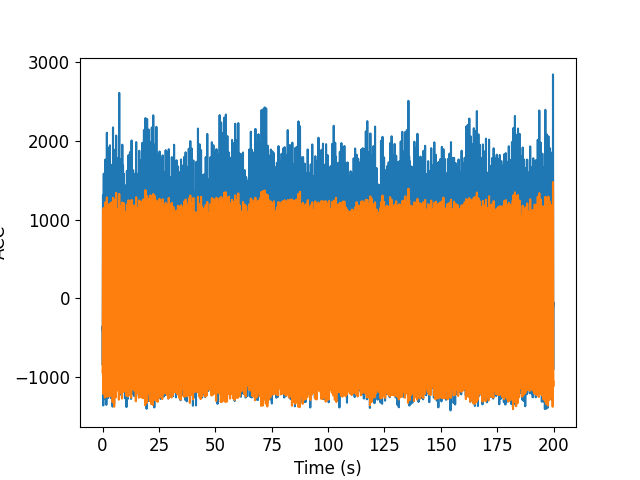

In [91]:
# Find components characterizing respiration
cadence_components = [0, 1]
fig = plt.figure()
plt.plot(time, filt_acc)
plt.plot(time, np.sum(Y_acc2[:, cadence_components], axis=1), label='Cadence')
plt.ylabel('ACC')
plt.xlabel('Time (s)')

Text(0.5, 0, 'Time (s)')

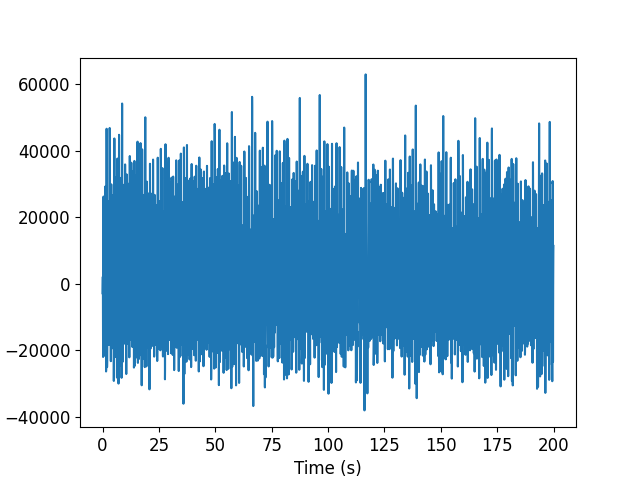

In [92]:
# Remove respiration component(s)
filt_x2 = filt_x - np.sum(Y_2[:, resp_components], 1)
fig = plt.figure()
plt.plot(time, filt_x2)
plt.ylabel('PPG')
plt.xlabel('Time (s)')

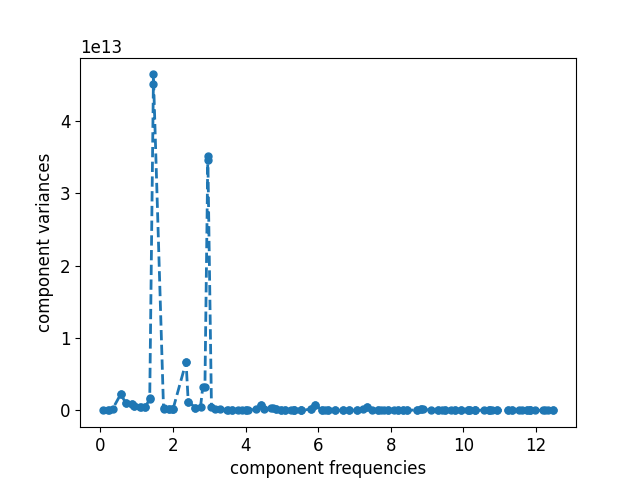

In [93]:
# Apply SSA on signal without baseline, nor respiration
# Set L to identify running cadence and heart rate
L = 150  # Example value, adjust as needed
Y_3, fc_3, sig_3 = ssa_decomposition(filt_x2, L, fs, 2)